# Code

In [8]:
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import numpy as np
%matplotlib inline

# load data
ws = 2
def data_loader(fname):

    data = np.loadtxt(fname, skiprows=1, dtype='float')

    #energy =  data[:,0]
    energy =  data[int(ws/2)-1:int(-1*ws/2),0]

    pdos_up = []
    pdos_dw = []
    arr_up = data[:,5]+  data[:,7]+  data[:,9]
    arr_dw = data[:,6] +  data[:,8] + data[:,10] 
    i = 0
    while i < len(arr_up)-ws + 1:
        window = arr_up[i : i + ws]
        avg = sum(window)/ws
        pdos_up.append(avg)
        i += 1
    i = 0
    while i < len(arr_dw)-ws + 1:
        window = arr_dw[i : i + ws]
        avg = sum(window)/ws
        pdos_dw.append(-1*avg)
        i += 1

    return energy, pdos_up, pdos_dw
def plot_pdos(isRelaxed, qval):
    if isRelaxed:
        fnameprefix = f"relaxed/{qval}/6.pdos_files"
        title = f"relaxed"
        #_, pdos_tot_up, pdos_tot_dw = data_loader(f'{fnameprefix}/Cu_vac_in_ZnS.{qval}.pdos_tot')
    else:
        fnameprefix = f"unrelaxed/{qval}/6.pdos_files"
        title = f"unrelaxed"
        _, pdos_tot_up, pdos_tot_dw = data_loader(f'{fnameprefix}/Cu_vac_in_ZnS.{qval}.unrlxd.pdos_tot')

    energy, pdos_Cu_3d_up, pdos_Cu_3d_dw = data_loader(f'{fnameprefix}/Cu_vac_in_ZnS.q0.pdos_atm#57(Cu)_wfc#1(s)')
    energy, pdos_eCu_3d_up, pdos_eCu_3d_dw = data_loader(f'{fnameprefix}/Cu_vac_in_ZnS.q0.pdos_atm#57(Cu)_wfc#1(s)')
    #_, pdos_S_up, pdos_S_dw = data_loader(f'{fnameprefix}/S.pdos')
    #_, pdos_Zn_up, pdos_Zn_dw = data_loader(f'{fnameprefix}/Zn.pdos')

    fermi = 5.5452
    my_dpi=99
    fig,ax = plt.subplots(figsize=(777/my_dpi,657/my_dpi), dpi=my_dpi)

    # plot data
    #ax.plot(energy - fermi, pdos_S_up, linewidth=1, color='#006699', label='S')
    #ax.plot(energy - fermi, pdos_S_dw, linewidth=1, color='#006699')

    #ax.plot(energy - fermi, pdos_Zn_up, linewidth=1, color='g', label='Zn')
    #ax.plot(energy - fermi, pdos_Zn_dw, linewidth=1, color='g')

    ax.plot(energy - fermi, pdos_Cu_3d_up, linewidth=1, color='r', label='T2')
    ax.plot(energy - fermi, pdos_Cu_3d_dw, linewidth=1, color='r')

    ax.plot(energy - fermi, pdos_eCu_3d_up, linewidth=1, color='r', label='eg')
    ax.plot(energy - fermi, pdos_eCu_3d_dw, linewidth=1, color='r')

    #ax.plot(energy - fermi, pdos_tot_up, linewidth=1, color='k', label='total')
    #ax.plot(energy - fermi, pdos_tot_dw, linewidth=1, color='k')
    ax.set_xlabel('Energy (eV)')
    ax.set_ylabel('DOS')
    ax.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
    #ax.fill_between(energy - fermi, 0, pdos_S_up, where=(energy - fermi < 0), facecolor='#006699', alpha=0.25)
    #ax.fill_between(energy - fermi, 0, pdos_S_dw, where=(energy - fermi < 0), facecolor='#006699', alpha=0.25)
    #ax.fill_between(energy - fermi, 0, pdos_Zn_up, where=(energy - fermi < 0), facecolor='g', alpha=0.25)
    #ax.fill_between(energy - fermi, 0, pdos_Zn_dw, where=(energy - fermi < 0), facecolor='g', alpha=0.25)
    #ax.fill_between(energy - fermi, 0, pdos_Cu_3d_up, where=(energy - fermi < 0), facecolor='r', alpha=0.25)
    #ax.fill_between(energy - fermi, 0, pdos_Cu_3d_dw, where=(energy - fermi < 0), facecolor='r', alpha=0.25)
    #ax.fill_between(energy - fermi, 0, pdos_tot_up, where=(energy - fermi < 0), facecolor='k', alpha=0.25)
    #ax.fill_between(energy - fermi, 0, pdos_tot_dw, where=(energy - fermi < 0), facecolor='k', alpha=0.25)
    ax.legend(frameon=False)
    ax.set_xticks(np.arange(-12,6,1))

    # adjust subplot layout
    plt.subplots_adjust(hspace=0.4)
    plt.xlim(-2, 4)
    plt.ylim(-50, 50)
    # set the overall title
    plt.suptitle(r"Projected DOS for $\mathrm{Cu_{Zn}}$-$\mathrm{\mathit{V}_{S}}$ in ZnS " + f"({qval}, {title})")
    plt.tight_layout()
    # show the plot
    plt.show()

In [9]:
def plot_dos(isRelaxed, qval):
    if isRelaxed:
        fname = f"relaxed/{qval}/5.Cu_vac_in_ZnS.{qval}.dos"
        title = f"relaxed"
    else:
        fname = f"unrelaxed/{qval}/5.Cu_vac_in_ZnS.{qval}.unrlxd.dos"
        title = f"unrelaxed"

    for ws in [2]:		# This is the window size
        data = np.loadtxt(fname, skiprows=1, dtype='float')

        mov_avg_up = []
        arr_up = data[:,1]
        mov_avg_dw = []
        arr_dw = data[:,2]

        i = 0
        while i < len(arr_up)-ws + 1:
            window = arr_up[i : i + ws]
            avg = sum(window)/ws
            mov_avg_up.append(avg)
            i += 1

        i = 0
        while i < len(arr_dw)-ws + 1:
            window = arr_dw[i : i + ws]
            avg = sum(window)/ws
            mov_avg_dw.append(-1*avg)
            i += 1
        my_dpi=99
        fig,ax = plt.subplots(figsize=(777/my_dpi,657/my_dpi), dpi=my_dpi)

        plt.xlabel("Energy (eV)")
        plt.ylabel("DOS (states/eV)")
        plt.ylim(-60,60)
        plt.xlim(-2,4)

        fermi=5.5452

        aaa = data[int(ws/2)-1:int(-1*ws/2),0]

        ax.plot(aaa-fermi, mov_avg_up, label="Up spin", linewidth=0.7, color='k')
        ax.plot(aaa-fermi, mov_avg_dw, label="Down spin", linewidth=0.7, color='k')

        plt.title(r"Density of states of ZnS with $\mathrm{Cu_{Zn}}$-$\mathrm{\mathit{V}_{S}}$, " + f"({qval}, {title})")

        plt.fill_between(aaa-fermi,0,mov_avg_up,where=(aaa <fermi), facecolor='k', alpha=0.15)
        plt.fill_between(aaa-fermi,0,mov_avg_dw,where=(aaa <fermi), facecolor='r', alpha=0.15)

        plt.axvline(x=0, linewidth=0.5, color='k', linestyle=(0, (8, 10)))
        #plt.text(0.2, 22.7, 'Fermi energy', rotation=90, fontsize=15)
        plt.tick_params(axis='both', which='major', labelsize=14)

        ax.legend()

    plt.show()

In [10]:
plot_pdos(True, "q0")

IndexError: index 5 is out of bounds for axis 1 with size 5

# Plots
Two functions are impelemented. `plot_pdos(isRelaxed, q)` and `plot_dos(isRelaxed, q)` where isRelaxed is a Boolean variable (set it to `True` for relaxed structure, `False` otherwise), and `q` is a string. `q` can take values such as `"q0"`, `"qp1"`. `"qp2"`, `"qn1"`, `"qn2"`, etc. The default window size for moving average is 2. Change the code above (the `ws` variable) if other window sizes are needed

## PDOS

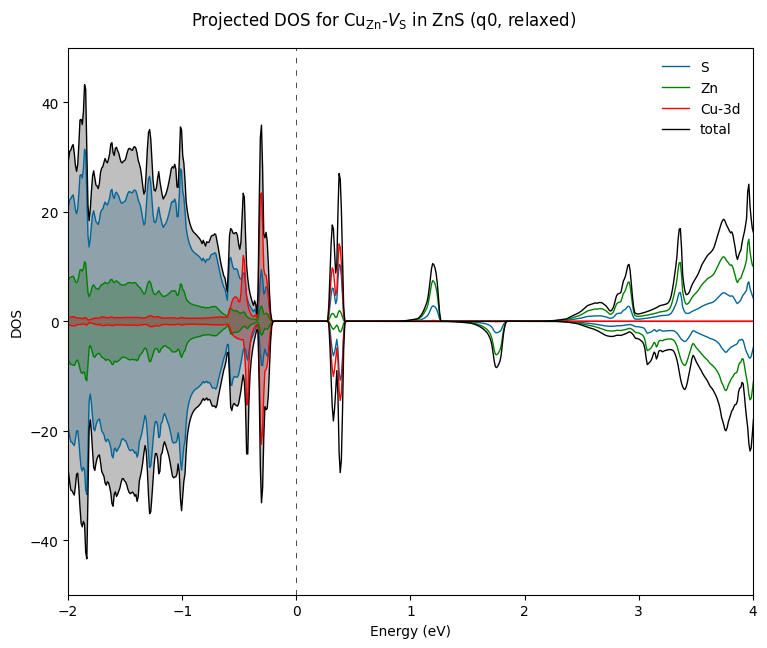

In [14]:
plot_pdos(True, "q0")

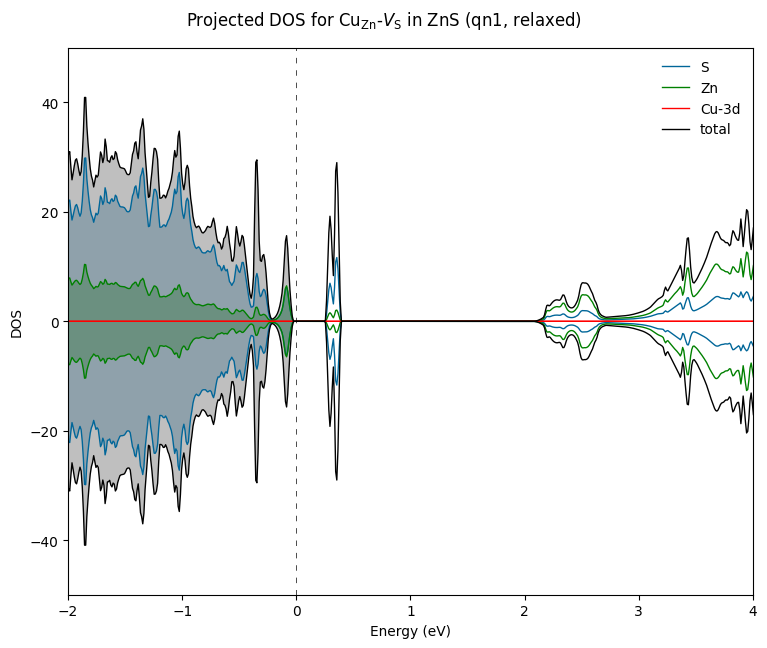

In [15]:
plot_pdos(True, "qn1")

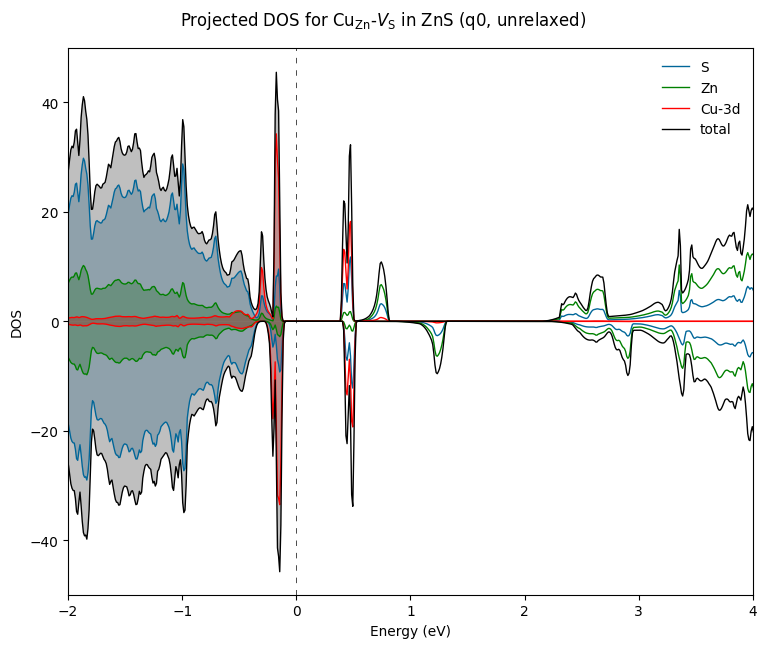

In [16]:
plot_pdos(False, "q0")

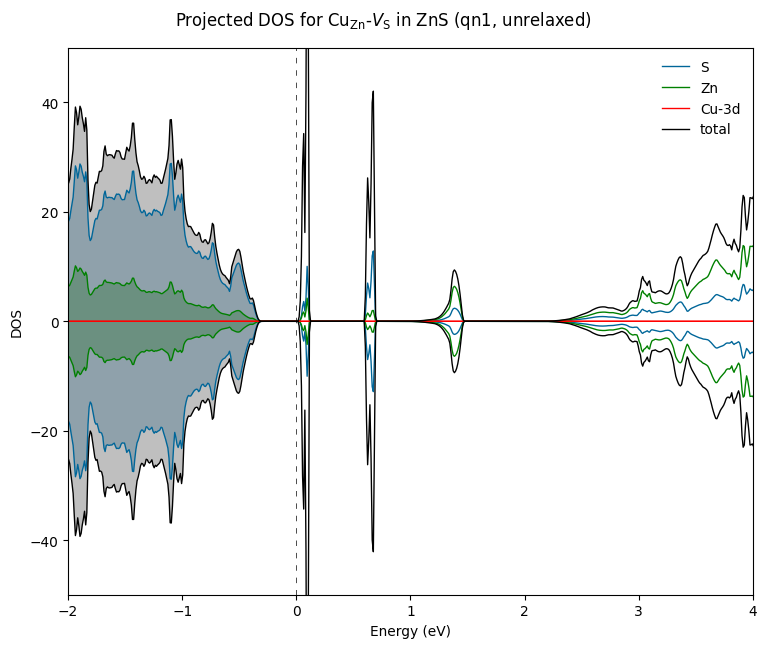

In [17]:
plot_pdos(False, "qn1")

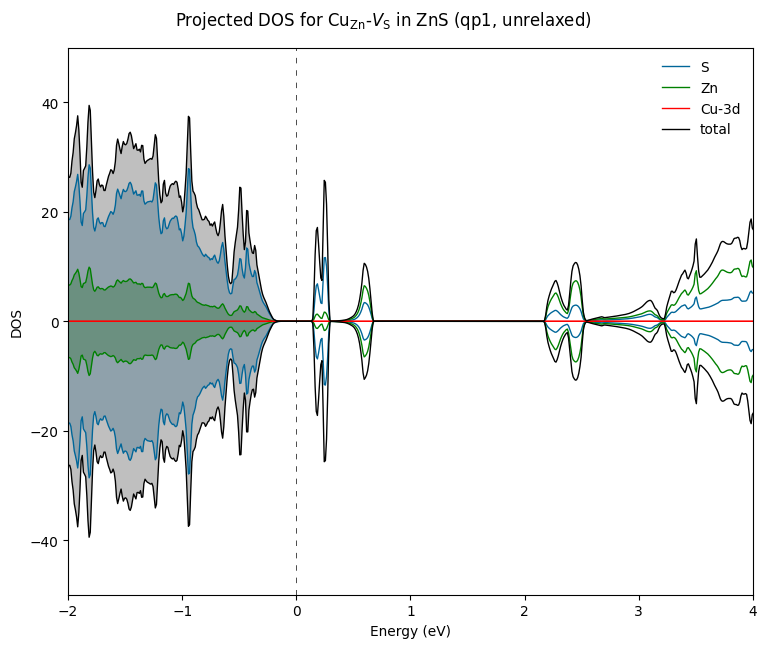

In [18]:
plot_pdos(False, "qp1")

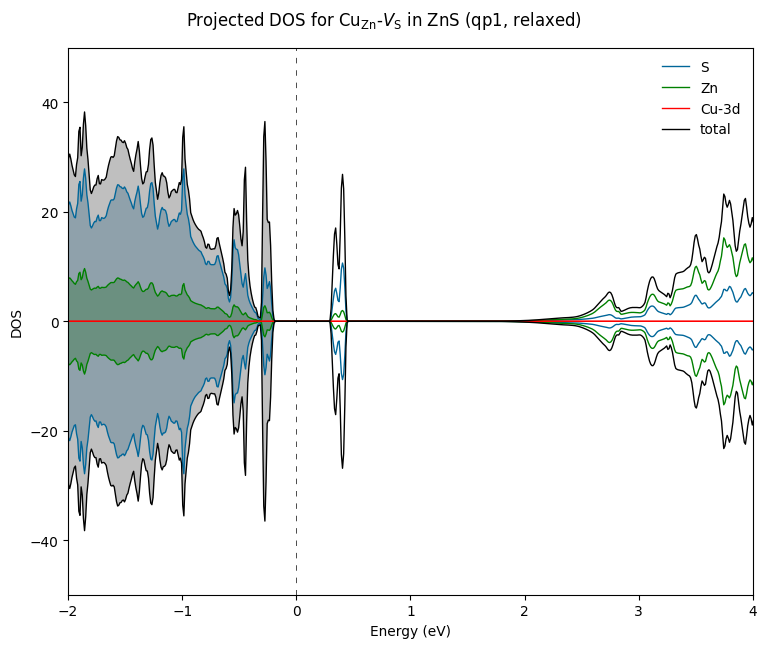

In [19]:
plot_pdos(True, "qp1")

## DOS

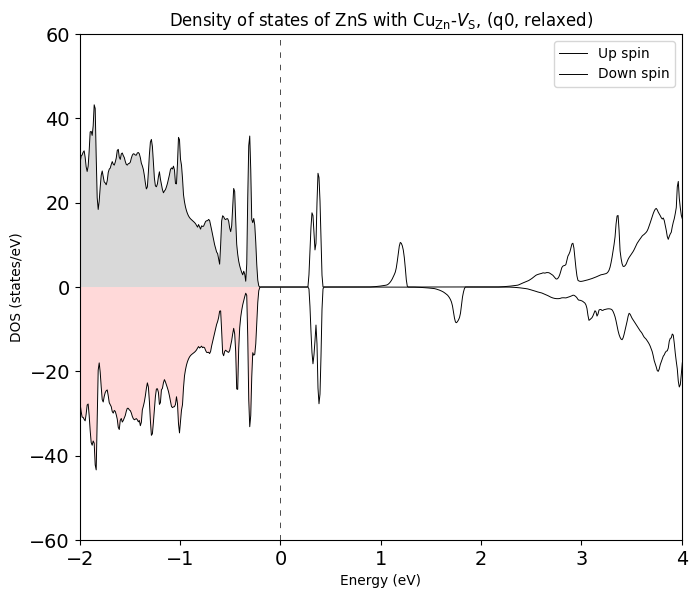

In [4]:
plot_dos(True, "q0")

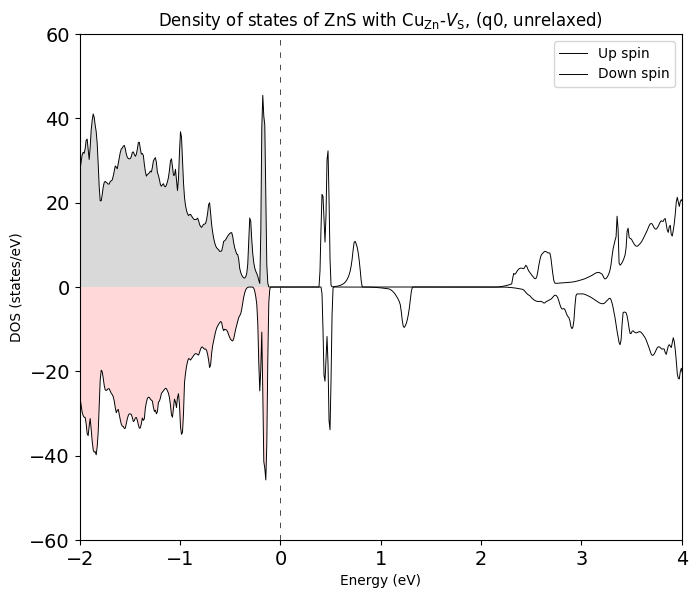

In [5]:
plot_dos(False, "q0")

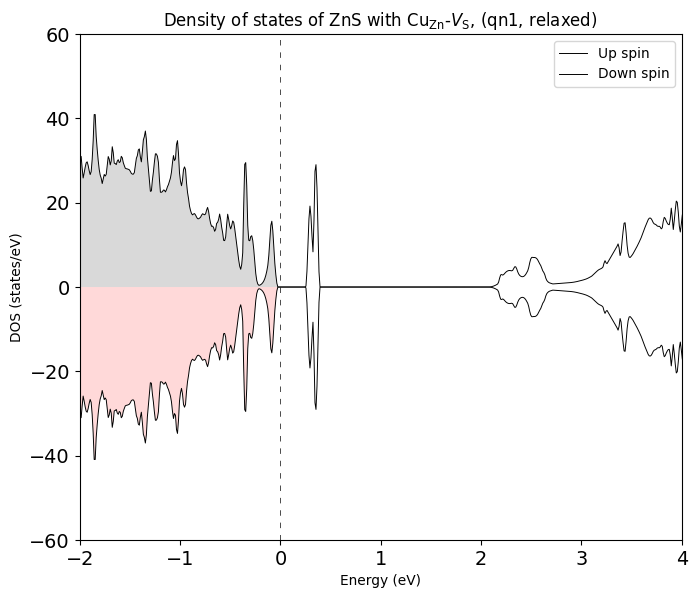

In [6]:
plot_dos(True, "qn1")

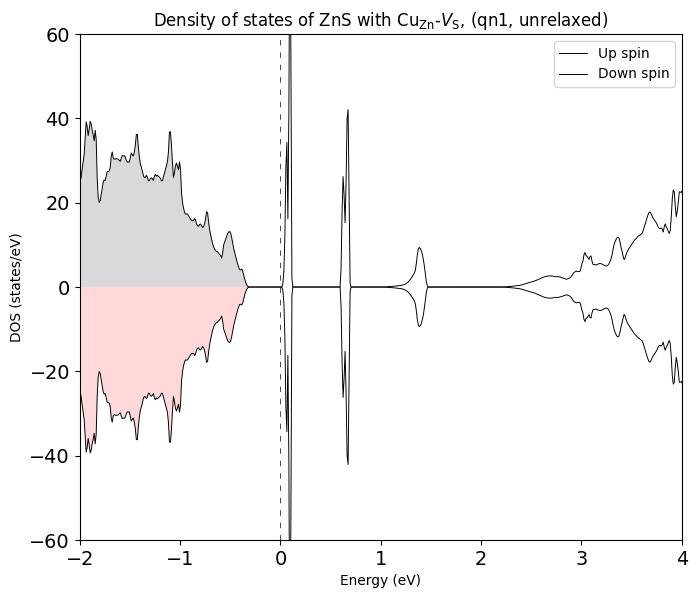

In [7]:
plot_dos(False, "qn1")

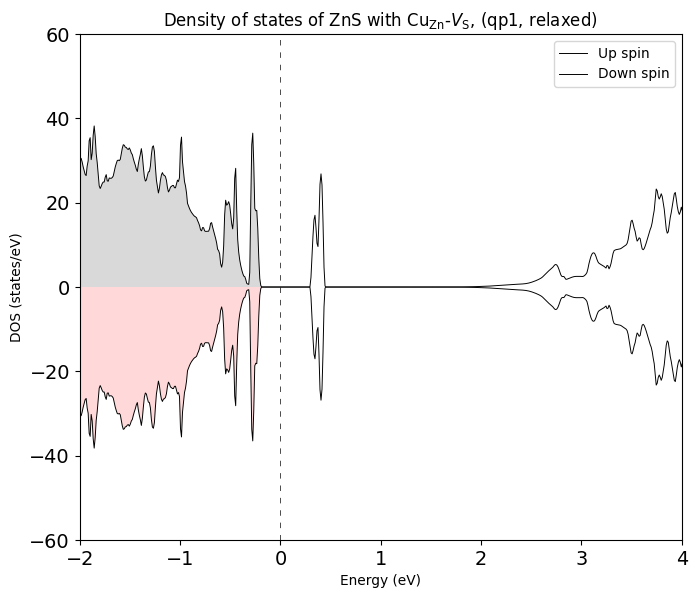

In [8]:
plot_dos(True, "qp1")

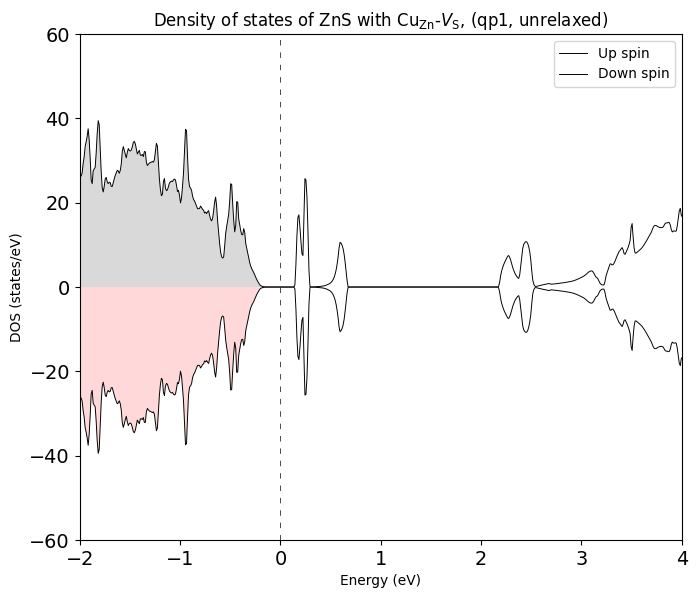

In [9]:
plot_dos(False, "qp1")